In [1]:
import scanpy as sc
import pandas as pd

In [2]:
adata = sc.read_h5ad("lin-lung-clustered.h5ad")

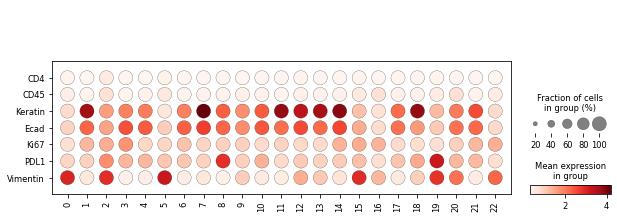

In [3]:
sc.pl.dotplot(adata, groupby='leiden', var_names=['CD4','CD45','Keratin','Ecad','Ki67','PDL1','Vimentin'],
             swap_axes=True)

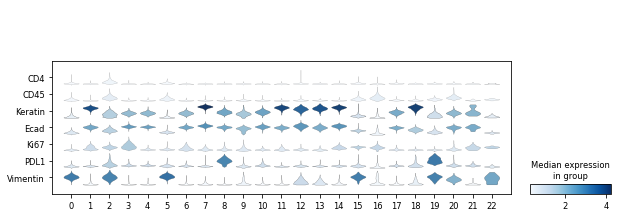

In [4]:
sc.pl.stacked_violin(adata, groupby='leiden', var_names=['CD4','CD45','Keratin','Ecad','Ki67','PDL1','Vimentin'],
                    swap_axes=True)

In [5]:
cluster_mapping = {
    'Epithelial': ['1', '4', '7', '9', '10', '11', '16', '5', '17'],
    'Epithelial proliferative': ['3', '6', '14'],
    'Stromal': ['0','5', '15', '19', '22'],
    'Unclear': ['2', '12', '13', '20'],
    'Epithelial I-P': ['21'],
    'Epithelial immunosuppressive': ['2','8', '18'],
    'Other immune': ['16']
}


inverse_mapping = {i: k for k,v in cluster_mapping.items() for i in v}

In [6]:
x = list(inverse_mapping.keys()).copy()
x.sort()
x

['0',
 '1',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '2',
 '20',
 '21',
 '22',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9']

In [7]:
inverse_mapping

{'1': 'Epithelial',
 '4': 'Epithelial',
 '7': 'Epithelial',
 '9': 'Epithelial',
 '10': 'Epithelial',
 '11': 'Epithelial',
 '16': 'Other immune',
 '5': 'Stromal',
 '17': 'Epithelial',
 '3': 'Epithelial proliferative',
 '6': 'Epithelial proliferative',
 '14': 'Epithelial proliferative',
 '0': 'Stromal',
 '15': 'Stromal',
 '19': 'Stromal',
 '22': 'Stromal',
 '2': 'Epithelial immunosuppressive',
 '12': 'Unclear',
 '13': 'Unclear',
 '20': 'Unclear',
 '21': 'Epithelial I-P',
 '8': 'Epithelial immunosuppressive',
 '18': 'Epithelial immunosuppressive'}

In [8]:
obs = adata.obs[['cell_id', 'leiden']]

In [9]:
obs = obs.loc[obs.leiden.isin(inverse_mapping.keys())]

In [10]:
cell_types = [inverse_mapping[i] for i in obs.leiden]

In [11]:
obs['cell_type'] = cell_types

In [12]:
obs.set_index('cell_id').to_csv("../data/lin-clusters-annotated.tsv", sep="\t")